<a href="https://colab.research.google.com/github/Shreya-singh01/Anti-Spoofing-Detector/blob/main/Anti_Spoofing_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
!pip install cvzone
!pip install opencv-python-headless
!pip install mediapipe

In [ ]:
# #DATA COLLECTION WITH LABELS
# from google.colab import output
# from IPython.display import display, Javascript
# from google.colab.output import eval_js
# from base64 import b64decode
# import cv2
# import numpy as np
# import os

# # Function to capture images and save them with labels
# def take_photo(label, filename='photo.jpg', quality=0.8):
#     js = Javascript('''
#         async function takePhoto(quality) {
#             const div = document.createElement('div');
#             const capture = document.createElement('button');
#             capture.textContent = 'Capture';
#             div.appendChild(capture);
#             document.body.appendChild(div);

#             // Load the webcam
#             const video = document.createElement('video');
#             video.style.display = 'block';
#             const stream = await navigator.mediaDevices.getUserMedia({video: true});
#             document.body.appendChild(video);
#             video.srcObject = stream;
#             await new Promise((resolve) => {
#                 video.onloadedmetadata = () => {
#                     resolve(video);
#                 };
#             });
#             video.play();

#             // Capture the photo when the button is clicked
#             await new Promise((resolve) => capture.onclick = resolve);

#             const canvas = document.createElement('canvas');
#             canvas.width = video.videoWidth;
#             canvas.height = video.videoHeight;
#             canvas.getContext('2d').drawImage(video, 0, 0);
#             stream.getVideoTracks()[0].stop();
#             const data = canvas.toDataURL('image/jpeg', quality);
#             div.remove();
#             video.remove();
#             return data;
#         }
#         ''')
#     display(js)
#     data = eval_js('takePhoto({})'.format(quality))
#     binary = b64decode(data.split(',')[1])

#     # Define directory based on label
#     label_dir = os.path.join("collected_images", label)
#     os.makedirs(label_dir, exist_ok=True)

#     with open(os.path.join(label_dir, filename), 'wb') as f:
#         f.write(binary)
#     print(f"Saved {filename} in {label_dir}")

# # Collect 'real' images (with person present)
# for i in range(5):  # Change the range to collect more images
#     take_photo(label="real", filename=f'real_{i}.jpg')

# # Collect 'fake' images (with a photo on a mobile phone)
# for i in range(5):  # Change the range to collect more images
#     take_photo(label="fake", filename=f'fake_{i}.jpg')


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [52]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Directories for labeled data
real_dir = os.path.join('collected_images', 'real')
fake_dir = os.path.join('collected_images', 'fake')

# Output directories for train, validation, and test sets
split_data_dir = 'SplitData'
train_dir = os.path.join(split_data_dir, 'train')
val_dir = os.path.join(split_data_dir, 'val')
test_dir = os.path.join(split_data_dir, 'test')

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def get_all_images_from_subdirs(main_dir):
    images = []
    for subdir in sorted(os.listdir(main_dir)):
        subdir_path = os.path.join(main_dir, subdir)
        if os.path.isdir(subdir_path):
            images.extend([os.path.join(subdir_path, f) for f in os.listdir(subdir_path) if f.endswith('.jpg')])
    return images

# Get the list of image files for each label from subdirectories 0001 to 0010
real_images = get_all_images_from_subdirs(real_dir)
fake_images = get_all_images_from_subdirs(fake_dir)

# Split real images into train, validation, and test sets
real_train, real_val_test = train_test_split(real_images, test_size=0.3, random_state=42)
real_val, real_test = train_test_split(real_val_test, test_size=0.5, random_state=42)

# Split fake images into train, validation, and test sets
fake_train, fake_val_test = train_test_split(fake_images, test_size=0.3, random_state=42)
fake_val, fake_test = train_test_split(fake_val_test, test_size=0.5, random_state=42)

# Helper function to save split data into respective directories
def save_split(images, directory, label):
    label_dir = os.path.join(directory, label)
    os.makedirs(label_dir, exist_ok=True)
    for img_path in images:
        shutil.copy(img_path, label_dir)

# Save the splits into train, validation, and test directories under SplitData
save_split(real_train, train_dir, 'real')
save_split(fake_train, train_dir, 'fake')

save_split(real_val, val_dir, 'real')
save_split(fake_val, val_dir, 'fake')

save_split(real_test, test_dir, 'real')
save_split(fake_test, test_dir, 'fake')

print("Data has been successfully split and saved into the SplitData directory.")


Data has been successfully split and saved into the SplitData directory.


In [ ]:
# #DATA Splitting with libraires
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# # Directories for labeled data
# real_dir = os.path.join('collected_images', 'real')
# fake_dir = os.path.join('collected_images', 'fake')

# # Output directories for train, validation, and test sets
# # Parent directory for the split data
# split_data_dir = 'SplitData'
# train_dir = os.path.join(split_data_dir, 'train')
# val_dir = os.path.join(split_data_dir, 'val')
# test_dir = os.path.join(split_data_dir, 'test')

# # Create directories if they don't exist
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(val_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Get the list of image files for each label
# real_images = [os.path.join(real_dir, f) for f in os.listdir(real_dir) if f.endswith('.jpg')]
# fake_images = [os.path.join(fake_dir, f) for f in os.listdir(fake_dir) if f.endswith('.jpg')]

# # Combine all images and corresponding labels
# all_images = real_images + fake_images
# labels = [1] * len(real_images) + [0] * len(fake_images)  # 1 for real, 0 for fake



# # Split real images into train, validation, and test sets
# real_train, real_val_test = train_test_split(real_images, test_size=0.3, random_state=42)
# real_val, real_test = train_test_split(real_val_test, test_size=0.5, random_state=42)

# # Split fake images into train, validation, and test sets
# fake_train, fake_val_test = train_test_split(fake_images, test_size=0.3, random_state=42)
# fake_val, fake_test = train_test_split(fake_val_test, test_size=0.5, random_state=42)

# # Helper function to save split data into respective directories
# def save_split(images, directory, label):
#     label_dir = os.path.join(directory, label)
#     os.makedirs(label_dir, exist_ok=True)
#     for img_path in images:
#         shutil.copy(img_path, label_dir)

# # Save the splits into train, validation, and test directories under SplitData
# save_split(real_train, train_dir, 'real')
# save_split(fake_train, train_dir, 'fake')

# save_split(real_val, val_dir, 'real')
# save_split(fake_val, val_dir, 'fake')

# save_split(real_test, test_dir, 'real')
# save_split(fake_test, test_dir, 'fake')

# print("Data has been successfully split and saved into the SplitData directory.")


In [53]:
#TRAINING THE MODEL
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/SplitData/train',
    target_size=(64, 64),
    batch_size=16,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/SplitData/val',
    target_size=(64, 64),
    batch_size=16,
    class_mode='binary'
)

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary output for real/fake
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=370,
    epochs=20,
    validation_data=val_generator,
    validation_steps=79
)


Found 5913 images belonging to 2 classes.
Found 1268 images belonging to 2 classes.
Epoch 1/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8814 - loss: 0.2644 - val_accuracy: 0.9960 - val_loss: 0.0181
Epoch 2/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.8601e-06
Epoch 3/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9926 - loss: 0.0202 - val_accuracy: 0.9858 - val_loss: 0.0400
Epoch 4/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 33us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 5/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9933 - loss: 0.0228 - val_accuracy: 0.9960 - val_loss: 0.0131
Epoch 6/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 2.6964e-05
Epoch 7/20
370/370 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9967 - loss: 0.0094 - val_accuracy: 0.9945 

In [54]:
# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(
    '/content/SplitData/test',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_acc}")

# Save the model for future use
model.save('anti_spoofing_model.h5')


Found 1270 images belonging to 2 classes.
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9988 - loss: 0.0022


Test Accuracy: 0.9992126226425171


In [55]:

# Testing the model on a sample image
import numpy as np
from tensorflow.keras.preprocessing import image
#attendance=0
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        print(f"{img_path} is predicted as Real (1)")
        #attendance=1
    else:
        print(f"{img_path} is predicted as Fake (0)")
        #attendance=0






In [56]:

# Replace 'path_to_image' with the path to an image you want to test
predict_image('/content/collected_images/real/0004/0004_01_00_01_112.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
/content/collected_images/real/0004/0004_01_00_01_112.jpg is predicted as Real (1)


In [57]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

<IPython.core.display.Javascript object>

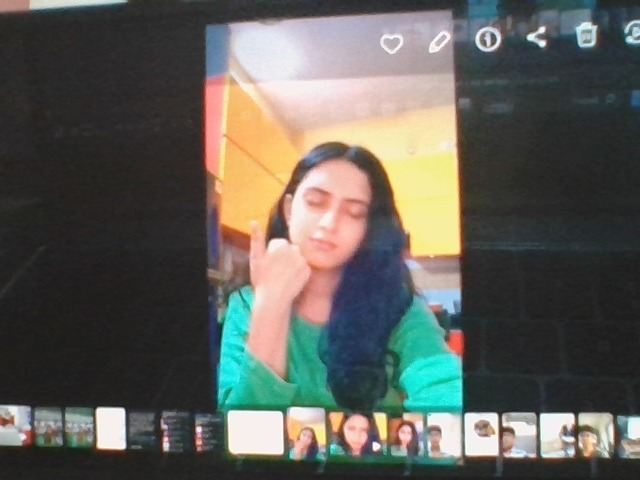

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
captured_image.jpg is predicted as Fake (0)


In [59]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import cv2
from PIL import Image
from io import BytesIO

def capture_image():
    js = Javascript('''
        async function takePhoto() {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
            document.body.appendChild(div);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(video);
            video.srcObject = stream;
            await new Promise((resolve) => video.onloadedmetadata = () => resolve());
            video.play();

            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            video.remove();
            div.remove();
            return canvas.toDataURL('image/jpeg').replace(/^data:image\\/jpeg;base64,/, '');
        }
        ''')
    display(js)
    data = eval_js('takePhoto()')
    img = Image.open(BytesIO(b64decode(data)))
    return img

# Capture the image
img = capture_image()

# Convert the image to an OpenCV format
img = np.array(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Save the captured image
cv2.imwrite('captured_image.jpg', img)

# Display the image
from google.colab.patches import cv2_imshow
cv2_imshow(img)
predict_image('captured_image.jpg')


In [60]:
!pip install dlib
!pip install face_recognition
!pip install opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=f9203907a29be7839c5ffa866dbb658ed5ad767aa4660730e3835a1d00bdb648
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [61]:
import face_recognition
import cv2
import numpy as np
import os


In [64]:
# def load_known_faces(known_faces_dir):
#     real = []
#     known_names = []

#     for person_name in os.listdir(real_dir):
#         person_dir = os.path.join(real_dir, person_name)
#         for image_name in os.listdir(person_dir):
#             image_path = os.path.join(person_dir, image_name)
#             image = face_recognition.load_image_file(image_path)
#             encoding = face_recognition.face_encodings(image)[0]
#             known_faces.append(encoding)
#             known_names.append(person_name)

#     return real, known_names

# # Load known faces
# real, known_names = load_known_faces('/content/collected_images/real')

import face_recognition
import os

def load_known_faces(known_faces_dir):
    known_faces = []  # Renamed to match the return statement
    known_names = []

    # Iterate over each subfolder (0001, 0002, ..., 0010) in the real directory
    for person_name in os.listdir(known_faces_dir):
        person_dir = os.path.join(known_faces_dir, person_name)

        # Ensure the path is a directory
        if os.path.isdir(person_dir):
            for image_name in os.listdir(person_dir):
                image_path = os.path.join(person_dir, image_name)
                image = face_recognition.load_image_file(image_path)

                # Check if face encoding is possible
                encodings = face_recognition.face_encodings(image)
                if encodings:
                    known_faces.append(encodings[0])
                    known_names.append(person_name)

    return known_faces, known_names

# Load known faces from the real folder under collected_images
known_faces_dir = '/content/collected_images/real'
known_faces, known_names = load_known_faces(known_faces_dir)

# Print the results to verify
print(f"Loaded {len(known_faces)} face encodings.")
print("Corresponding names:",known_names)


In [64]:
import face_recognition
import os

def load_known_faces(known_faces_dir):
    known_faces = []
    known_names = []

    for person_name in os.listdir(known_faces_dir):
        person_dir = os.path.join(known_faces_dir, person_name)

        if os.path.isdir(person_dir):
            for image_name in os.listdir(person_dir):
                image_path = os.path.join(person_dir, image_name)
                # Check if the file is a valid image file before attempting to load
                if image_name.lower().endswith(('.png', '.jpg', '.jpeg')): # Add other valid extensions if needed
                    image = face_recognition.load_image_file(image_path)
                    encodings = face_recognition.face_encodings(image)
                    if encodings:
                        known_faces.append(encodings[0])
                        known_names.append(person_name)

    return known_faces, known_names

# Load known faces from the real folder under collected_images
known_faces_dir = '/content/collected_images/real'
known_faces, known_names = load_known_faces(known_faces_dir)

print(f"Loaded {len(known_faces)} face encodings.")
print("Corresponding names:",known_names)

Loaded 2726 face encodings.
Corresponding names: ['0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0009', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003', '0003'

In [70]:
def capture_image_from_file(image_path):
    image = face_recognition.load_image_file(image_path)
    return image

# Example of loading an image to recognize
unknown_image = capture_image_from_file('/content/0015_01_05_03_27.jpg')


In [71]:
def recognize_faces(unknown_image, known_faces, known_names):
    face_locations = face_recognition.face_locations(unknown_image)
    face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

    recognized_names = []

    for face_encoding in face_encodings:
        matches = face_recognition.compare_faces(known_faces, face_encoding)
        name = "Unknown"

        if True in matches:
            first_match_index = matches.index(True)
            name = known_names[first_match_index]

        recognized_names.append(name)

    return recognized_names

# Recognize faces in the unknown image
recognized_names = recognize_faces(unknown_image, known_faces, known_names)
print("Recognized:", recognized_names)


Recognized: ['0009']
